# Web scraping

- Python has many libraries to read HTML and XML formats
- Examples include `lxml`, `Beautiful Soup`, and `html5lib`
- `lxml` is usually faster but
- the other libraries can better handle malformed files

## Installing the necessary libraries

`pip install lxml beautifulsoup4 html5lib`

Let's also load up pandas

In [2]:
import pandas as pd

## Downloading and parsing water quality data

Head over to the National Water Information System ([https://waterdata.usgs.gov/nwis/rt](https://waterdata.usgs.gov/nwis/rt)) and find a station with available water temperature and turbidity data.

In [111]:
url = "https://waterdata.usgs.gov/nwis/dv?cb_00010=on&cb_63680=on&format=html&site_no=01161280&referred_module=sw&period=&begin_date=2018-02-24&end_date=2019-02-24"

Let's try to see if pandas has any functions that are appropriate to read data from such files.

Use `tab` completion!

The `read_html` function has a number of options, but by default it searches
for and attempts to parse all tabular data contained within `<table>` tags.

Try it! What is the result?

In [112]:
tables = pd.read_html(url)

Let's assign the table of interest to another variable

In [114]:
data = tables[4]
data

,Date,"Temper- ature, water, deg C,(Maximum)","Temper- ature, water, deg C,(Minimum)","Temper- ature, water, deg C,(Mean)","Turbid- ity, IR LED light,det ang90 deg, FNU,(Maximum)","Turbid- ity, IR LED light,det ang90 deg, FNU,(Minimum)","Turbid- ity, IR LED light,det ang90 deg, FNU,(Mean)"
0,06/22/2018,24.8P,22.7P,23.4P,2.9P,0.5P,1.0P
1,06/23/2018,23.5P,22.1P,22.9P,1.2P,0.4P,0.7P
2,06/24/2018,23.2P,21.9P,22.4P,13.5P,0.6P,1.6P
3,06/25/2018,23.3P,22.0P,22.6P,9.1P,0.8P,2.4P
4,06/26/2018,23.2P,21.9P,22.6P,3.1P,1.0P,1.4P
5,06/27/2018,22.9P,22.1P,22.5P,2.3P,0.8P,1.3P
6,06/28/2018,22.5P,21.8P,22.1P,18.8P,0.8P,3.5P
7,06/29/2018,25.0P,22.1P,22.9P,5.7P,1.2P,2.7P
8,06/30/2018,23.6P,22.6P,23.1P,6.5P,2.0P,2.9P
9,07/01/2018,24.6P,23.0P,23.7P,5.3P,1.8P,2.7P


What is the index of this DataFrame?

In [115]:
data.index

RangeIndex(start=0, stop=180, step=1)

We probably want the date to be an index

In [116]:
data.index = data['Date']
data

,Date,"Temper- ature, water, deg C,(Maximum)","Temper- ature, water, deg C,(Minimum)","Temper- ature, water, deg C,(Mean)","Turbid- ity, IR LED light,det ang90 deg, FNU,(Maximum)","Turbid- ity, IR LED light,det ang90 deg, FNU,(Minimum)","Turbid- ity, IR LED light,det ang90 deg, FNU,(Mean)"
Date,,,,,,,
06/22/2018,06/22/2018,24.8P,22.7P,23.4P,2.9P,0.5P,1.0P
06/23/2018,06/23/2018,23.5P,22.1P,22.9P,1.2P,0.4P,0.7P
06/24/2018,06/24/2018,23.2P,21.9P,22.4P,13.5P,0.6P,1.6P
06/25/2018,06/25/2018,23.3P,22.0P,22.6P,9.1P,0.8P,2.4P
06/26/2018,06/26/2018,23.2P,21.9P,22.6P,3.1P,1.0P,1.4P
06/27/2018,06/27/2018,22.9P,22.1P,22.5P,2.3P,0.8P,1.3P
06/28/2018,06/28/2018,22.5P,21.8P,22.1P,18.8P,0.8P,3.5P
06/29/2018,06/29/2018,25.0P,22.1P,22.9P,5.7P,1.2P,2.7P
06/30/2018,06/30/2018,23.6P,22.6P,23.1P,6.5P,2.0P,2.9P


Now we have a duplicate Date column. Let's get rid of it!

In [117]:
del data['Date']

There's another way to do this though. Let's go back to the reading function

In [119]:
data = pd.read_html(url, parse_dates=True, index_col=0)[4]
data

,"Temper- ature, water, deg C,(Maximum)","Temper- ature, water, deg C,(Minimum)","Temper- ature, water, deg C,(Mean)","Turbid- ity, IR LED light,det ang90 deg, FNU,(Maximum)","Turbid- ity, IR LED light,det ang90 deg, FNU,(Minimum)","Turbid- ity, IR LED light,det ang90 deg, FNU,(Mean)"
Date,,,,,,
2018-06-22,24.8P,22.7P,23.4P,2.9P,0.5P,1.0P
2018-06-23,23.5P,22.1P,22.9P,1.2P,0.4P,0.7P
2018-06-24,23.2P,21.9P,22.4P,13.5P,0.6P,1.6P
2018-06-25,23.3P,22.0P,22.6P,9.1P,0.8P,2.4P
2018-06-26,23.2P,21.9P,22.6P,3.1P,1.0P,1.4P
2018-06-27,22.9P,22.1P,22.5P,2.3P,0.8P,1.3P
2018-06-28,22.5P,21.8P,22.1P,18.8P,0.8P,3.5P
2018-06-29,25.0P,22.1P,22.9P,5.7P,1.2P,2.7P
2018-06-30,23.6P,22.6P,23.1P,6.5P,2.0P,2.9P


Not a big fan of the formatting in the columns. Let's get rid of the hyphenation

In [120]:
data.columns = [c.replace('- ', '') for c in data.columns]
data

,"Temperature, water, deg C,(Maximum)","Temperature, water, deg C,(Minimum)","Temperature, water, deg C,(Mean)","Turbidity, IR LED light,det ang90 deg, FNU,(Maximum)","Turbidity, IR LED light,det ang90 deg, FNU,(Minimum)","Turbidity, IR LED light,det ang90 deg, FNU,(Mean)"
Date,,,,,,
2018-06-22,24.8P,22.7P,23.4P,2.9P,0.5P,1.0P
2018-06-23,23.5P,22.1P,22.9P,1.2P,0.4P,0.7P
2018-06-24,23.2P,21.9P,22.4P,13.5P,0.6P,1.6P
2018-06-25,23.3P,22.0P,22.6P,9.1P,0.8P,2.4P
2018-06-26,23.2P,21.9P,22.6P,3.1P,1.0P,1.4P
2018-06-27,22.9P,22.1P,22.5P,2.3P,0.8P,1.3P
2018-06-28,22.5P,21.8P,22.1P,18.8P,0.8P,3.5P
2018-06-29,25.0P,22.1P,22.9P,5.7P,1.2P,2.7P
2018-06-30,23.6P,22.6P,23.1P,6.5P,2.0P,2.9P


Let's calculate the mean of each variable

In [121]:
data.mean()

Series([], dtype: float64)

What happened?

- Is it because we have missing data?
- Is it because the data value are malformed?

In [122]:
data['Temperature, water, deg C,(Mean)'][0]

'23.4P'

In [123]:
type(data['Temperature, water, deg C,(Mean)'][0])

str

That's the culprit. Let's fix that!

In [124]:
data = data.applymap(lambda s: float(s[:s.find('P')]) if s==s else s)
data

,"Temperature, water, deg C,(Maximum)","Temperature, water, deg C,(Minimum)","Temperature, water, deg C,(Mean)","Turbidity, IR LED light,det ang90 deg, FNU,(Maximum)","Turbidity, IR LED light,det ang90 deg, FNU,(Minimum)","Turbidity, IR LED light,det ang90 deg, FNU,(Mean)"
Date,,,,,,
2018-06-22,24.8,22.7,23.4,2.9,0.5,1.0
2018-06-23,23.5,22.1,22.9,1.2,0.4,0.7
2018-06-24,23.2,21.9,22.4,13.5,0.6,1.6
2018-06-25,23.3,22.0,22.6,9.1,0.8,2.4
2018-06-26,23.2,21.9,22.6,3.1,1.0,1.4
2018-06-27,22.9,22.1,22.5,2.3,0.8,1.3
2018-06-28,22.5,21.8,22.1,18.8,0.8,3.5
2018-06-29,25.0,22.1,22.9,5.7,1.2,2.7
2018-06-30,23.6,22.6,23.1,6.5,2.0,2.9


Now let's calculate the mean of each column

In [125]:
data.mean()

Temperature, water, deg C,(Maximum)                     15.878261
Temperature, water, deg C,(Minimum)                     14.942857
Temperature, water, deg C,(Mean)                        15.360248
Turbidity, IR LED light,det ang90 deg, FNU,(Maximum)     8.155901
Turbidity, IR LED light,det ang90 deg, FNU,(Minimum)     1.937888
Turbidity, IR LED light,det ang90 deg, FNU,(Mean)        3.097516
dtype: float64

Now let's count the days with missing data for each column

In [126]:
data.isnull().sum()

Temperature, water, deg C,(Maximum)                     19
Temperature, water, deg C,(Minimum)                     19
Temperature, water, deg C,(Mean)                        19
Turbidity, IR LED light,det ang90 deg, FNU,(Maximum)    19
Turbidity, IR LED light,det ang90 deg, FNU,(Minimum)    19
Turbidity, IR LED light,det ang90 deg, FNU,(Mean)       19
dtype: int64

Next, let's find the dates when we have missing data for mean temperature

In [127]:
data.index[data['Temperature, water, deg C,(Mean)'].isnull()]

DatetimeIndex(['2018-07-19', '2018-07-20', '2018-07-21', '2018-07-22',
               '2018-07-23', '2018-07-24', '2018-07-25', '2018-07-26',
               '2018-07-27', '2018-07-28', '2018-07-29', '2018-07-30',
               '2018-07-31', '2018-08-01', '2018-08-02', '2018-08-03',
               '2018-08-04', '2018-08-05', '2018-08-06'],
              dtype='datetime64[ns]', name='Date', freq=None)

Now let's find out if no variable was measured when data are missing for at least one variable

In [128]:
missing_any = data.isnull().any(axis=1)
missing_all = data.isnull().all(axis=1)
data.index[missing_any] == data.index[missing_all]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Let's plot the mean temperature and turbidity

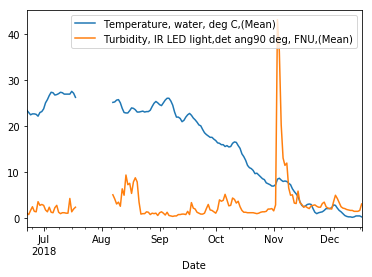

In [129]:
%matplotlib inline
data[['Temperature, water, deg C,(Mean)', 'Turbidity, IR LED light,det ang90 deg, FNU,(Mean)']].plot()

Let's calculate the correlation matrix for each variable

In [130]:
data.corr()

,"Temperature, water, deg C,(Maximum)","Temperature, water, deg C,(Minimum)","Temperature, water, deg C,(Mean)","Turbidity, IR LED light,det ang90 deg, FNU,(Maximum)","Turbidity, IR LED light,det ang90 deg, FNU,(Minimum)","Turbidity, IR LED light,det ang90 deg, FNU,(Mean)"
"Temperature, water, deg C,(Maximum)",1.000000,0.999032,0.999475,-0.043924,-0.233303,-0.141641
"Temperature, water, deg C,(Minimum)",0.999032,1.000000,0.999793,-0.048670,-0.229042,-0.142304
"Temperature, water, deg C,(Mean)",0.999475,0.999793,1.000000,-0.044872,-0.229984,-0.140620
"Turbidity, IR LED light,det ang90 deg, FNU,(Maximum)",-0.043924,-0.048670,-0.044872,1.000000,0.467503,0.835908
"Turbidity, IR LED light,det ang90 deg, FNU,(Minimum)",-0.233303,-0.229042,-0.229984,0.467503,1.000000,0.860949
"Turbidity, IR LED light,det ang90 deg, FNU,(Mean)",-0.141641,-0.142304,-0.140620,0.835908,0.860949,1.000000


Wouldn't it be nice if we had a generic way do download these data without first finding the URL?

Write a function that can extract a time series of temperature and/or turbidity.

In [142]:
def getUsgsData(station, sdate, edate, var=['00010', '63680']):
    """Retrieve temperature and turbidity data from USGS."""
    varstr = "".join(["cb_{0}=on&".format(v) for v in var])
    url = "https://nwis.waterdata.usgs.gov/nwis/uv?{0}format=html&site_no={1}&period=&begin_date={2}&end_date={3}".format(varstr, station, sdate, edate)
    data = pd.read_html(url, parse_dates=True, index_col=0)[-2]
    data.columns = [c.replace('- ', '') for c in data.columns]
    data = data.applymap(lambda s: float(s[:s.find('P')]) if s==s else s)
    return data

data2 = getUsgsData('01161280', '2018-06-01', '2018-06-30')
data2
data3 = getUsgsData('01104425', '2018-06-01', '2018-06-30')
data3

,"Turbidity, IR LED light,det ang90 deg, FNU,","Temperature, water, deg C,"
Date / Time,,
2018-06-01 00:00:00-04:00,NaN,15.5
2018-06-01 00:15:00-04:00,NaN,15.6
2018-06-01 00:30:00-04:00,NaN,15.6
2018-06-01 00:45:00-04:00,NaN,15.5
2018-06-01 01:00:00-04:00,NaN,15.4
2018-06-01 01:15:00-04:00,NaN,15.4
2018-06-01 01:30:00-04:00,NaN,15.4
2018-06-01 01:45:00-04:00,NaN,15.5
2018-06-01 02:00:00-04:00,NaN,15.6


Now let's do some data mining

In [143]:
data2.corrwith(data3)

Temperature, water, deg C,                    -0.199403
Turbidity, IR LED light,det ang90 deg, FNU,    0.054227
dtype: float64

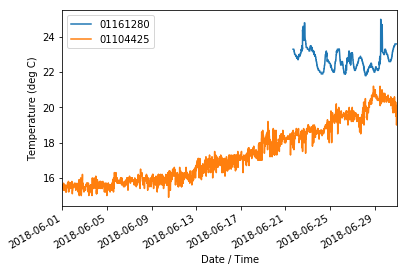

In [147]:
import matplotlib.pyplot as plt
data2['Temperature, water, deg C,'].plot(label='01161280')
data3['Temperature, water, deg C,'].plot(label='01104425')
plt.legend(loc=0)
plt.ylabel('Temperature (deg C)');